<a href="https://colab.research.google.com/github/Da-Seungheon/Data-Analysis-EDA/blob/main/%EB%AF%B8%EC%85%98_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[Mission] 기초 통계와 데이터 시각화**  
**┗ 건강검진 데이터 시각화하기**
---
> **목차(Context)**

* 데이터 살펴보기
* EDA

In [ ]:
# ▶ 한글 폰트 설정하기
!pip install koreanize_matplotlib -q
import matplotlib.pyplot as plt
import koreanize_matplotlib

# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **데이터 준비하기**
---

> **데이터 준비하기**

- 데이터 출처 : [공공데이터 포털](https://www.data.go.kr/data/15007122/fileData.do#/layer_data_infomation) `국민건강보험공단_건강검진정보`

    - 본 미션에서는 2022년 버전을 사용합니다. '국민건강보험공단_건강검진정보_20221231.CSV' 파일을 찾아 import 해주세요.

- 데이터 명세  

| No. | 표준항목명          | 영문명            | 설명                                                                                                           | 표현형식/단위          | 예시         |
|-----|-----------------|------------------|---------------------------------------------------------------------------------------------------------------|---------------------|--------------|
| 1   | 기준년도          | HCHK_YEAR        | 해당 정보의 기준년도를 제공함                                                                                  | YYYY                | 2009         |
| 2   | 가입자일련번호       | IDV_ID           | 해당가입자에 부여한 일련번호                                                                                  | 1 ~ 1,000,000       | 1            |
| 3   | 시도코드          | SIDO             | 해당 수진자 거주지의 시도코드                                                                                  | -                   | 26           |
| 4   | 성별              | SEX              | 해당 정보 대상자의 성별을 제공함                                                                               | 성별 : 1(남자), 2(여자) | 1            |
| 5   | 연령대코드(5세단위)    | AGE_GROUP        | 기준년도에 수진자의 나이를 5세 단위로 그룹화하여 구분한 코드                                                     | 5세 단위 그룹화, 85세 이상은 85+로 그룹화 | -            |
| 6   | 신장(5cm단위)     | HEIGHT           | 검진자의 키(5CM 단위)                                                                                          | N/Cm                | 140          |
| 7   | 체중(5kg단위)     | WEIGHT           | 검진자의 몸무게(5KG 단위)                                                                                      | N/Kg                | 45           |
| 8   | 허리둘레          | WAIST            | 검진자의 허리둘레                                                                                              | N/Cm                | 82           |
| 9   | 시력(좌)          | SIGHT_LEFT       | 수검자의 좌측 눈의 시력                                                                                        | N                   | 0.5          |
| 10  | 시력(우)          | SIGHT_RIGHT      | 수검자의 우측 눈의 시력                                                                                        | N                   | 0.5          |
| 11  | 청력(좌)          | HEAR_LEFT        | 수검자의 좌측 귀의 청력                                                                                        | N                   | 1            |
| 12  | 청력(우)          | HEAR_RIGHT       | 수검자의 우측 귀의 청력                                                                                        | N                   | 1            |
| 13  | 수축기혈압         | BP_HIGH          | 검진자의 최고 혈압으로 심장이 수축해서 강한 힘으로 혈액을 동맥에 보낼 때의 혈관 내압                                   | N/mmHg              | 140          |
| 14  | 이완기혈압         | BP_LWST          | 검진자의 최저 혈압으로 심장의 완기시의 혈압                                                                      | N/mmHg              | 81           |
| 15  | 식전혈당(공복혈당)    | BLDS             | 검진자 식사 전 혈당(혈액 100ml당 함유 되어 있는 포도당의 농도) 수치                                               | N/mg/dL             | 94           |
| 16  | 총콜레스테롤        | TOT_CHOLE        | 혈청 중의 에스텔형, 비에스테형(유리)콜레스테롤의 합                                                               | N/mg/dL             | 164          |
| 17  | 트리글리세라이드    | TRIGLYCERIDE     | 단순지질 혹은 중성지질을 뜻함                                                                                    | N/mg/dL             | 94           |
| 18  | HDL콜레스테롤      | HDL_CHOLE        | HDL(고밀도 리포단백질)에 포함되는 콜레스테롤                                                                      | N/mg/dL             | 45           |
| 19  | LDL콜레스테롤      | LDL_CHOLE        | LDL(저밀도 리포단백질)에 함유된 콜레스테롤                                                                        | N/mg/dL             | 150, 130     |
| 20  | 혈색소            | HMG              | 혈액이나 혈구 속에 존재하는 색소단백으로 글로빈(globin)과 엠(heme)으로 구성되며 혈중의 산소운반체로서의 역할 수행       | N/g/dL              | 15.3984375   |
| 21  | 요단백            | OLIG_PROTE_CD    | 소변에 단백질이 섞여 나오는 것                                                                                  | N                   | 1            |
| 22  | 혈청크레아티닌       | CREATININE       | 크레아틴의 탈수물로 내인성 단백대사의 종말산물로서 신장에서 배설되고 그 증감은 음식물에 관계없이 근육의 발육과 운동에 관계함 | N/mg/dL             | 0.8          |
| 23  | 혈청지오티(AST)    | AST              | 간 기능을 나타내는 혈액검사상의 수치, 간세포 이외에 심장, 신장, 뇌, 근육 등에도 존재하는 효소로 이러한 세포들이 손상을 받는 경우 농도가 증가함 | N/IU/L              | 12           |
| 24  | 혈청지피티(ALT)    | ALT              | 간 기능을 나타내는 혈액검사상의 수치, ALT는 주로 간세포 안에 존재하는 효소로, 간세포가 손상을 받는 경우 농도가 증가함        | N/U/L               | 15           |
| 25  | 감마지티피         | GAMMA_GTP        | 간 기능을 나타내는 혈액검사상의 수치, 간 내의 쓸개관(담관)에 존재하는 효소로 글루타민산을 외부에 펩티드나 아미노산 등으로 옮기는 작용을 함 | N/U/L               | 119, 114     |
| 26  | 흡연상태           | SMK_STAT_TYPE_CD | 해당 수검자의 흡연 상태 여부                                                                                    | N                   | 1            |
| 27  | 음주여부           | DRK_YN           | 해당 수검자의 음주 상태 여부                                                                                    | N/Y                 | 1            |
| 28  | 구강검진수검여부     | HCHK_OE_INSPEC_YN | 해당 검진자가 구강검진을 선택하여 검진하였는지 여부에 대한 항목                                                   | N/Y                 | 1            |
| 29  | 치아우식증유무       | CRS_YN           | 해당 수검자의 치아우식증 유무                                                                                   | N                   | 1            |
| 30  | 치석              | TTR_YN           | 해당 수검자의 치석 여부                                                                                         | N/Y                 | 1            |

     


In [ ]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
# Pandas 보기 옵션
pd.set_option('display.max_columns',100)

### 문제1. 데이터 불러오기
: 제공된 `./국민건강보험공단_건강검진정보_20221231.CSV` 파일을 불러오세요. 한글 폰트가 깨질 경우, 인코딩을 확인해보세요.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = '/content/drive/MyDrive/DA_6기/스프린트 개인미션/국민건강보험공단_건강검진정보_20221231.CSV'
df = pd.read_csv(data_path,encoding='cp949')

## **EDA : Data 살펴보기**  
---

* 수집된 데이터의 기본 정보들을 확인  

  (1) Data shape(형태) 확인

  (2) Data type 확인

  (3) Null값 확인 (※ 빈 값의 Data)

  (4) Outlier 확인 (※ 정상적인 범주를 벗어난 Data)  

### 전체적인 데이터 살펴보기

#### 문제2. 데이터의 형태를 확인해보세요.
- 몇 개의 데이터가 존재하나요?
- 몇 개의 특성이 존재하나요?

In [ ]:
# Data 형태 확인
print(df.shape)
print('1000000개의 행과 30개의 열로 구성 되어 있습니다.')

(1000000, 30)
1000000개의 행과 30개의 열로 구성 되어 있습니다.


#### 문제3. 데이터의 타입을 확인해보세요.
- 어떤 특성들이 데이터에 포함되어 있나요?
- 각 특성의 값은 어떤 데이터 타입으로 구성되어 있나요?

In [ ]:
# Data type 확인
df.dtypes

,0
기준년도,int64
가입자일련번호,int64
시도코드,int64
성별,int64
연령대코드(5세단위),int64
신장(5cm단위),int64
체중(5kg단위),int64
허리둘레,float64
시력(좌),float64
시력(우),float64


In [ ]:
# 데이터 값 확인 - 상위 30행을 출력하여 데이터를 확인해보세요.
df.head(30)

,기준년도,가입자일련번호,시도코드,성별,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
0,2022,702763,41,2,14,160,75,89.0,1.0,1.0,1.0,1.0,127.0,73.0,84.0,NaN,NaN,NaN,NaN,14.8,1.0,0.8,25.0,20.0,15.0,1.0,0.0,0,NaN,NaN
1,2022,765435,41,2,9,150,45,68.0,1.0,1.0,1.0,1.0,127.0,75.0,85.0,NaN,NaN,NaN,NaN,13.1,1.0,0.8,19.0,10.0,7.0,1.0,1.0,0,NaN,NaN
2,2022,343621,41,2,13,150,60,78.8,1.0,1.0,1.0,1.0,135.0,81.0,105.0,NaN,NaN,NaN,NaN,13.0,1.0,0.8,17.0,15.0,15.0,1.0,1.0,0,NaN,NaN
3,2022,3393534,41,2,6,160,50,69.0,1.0,1.0,1.0,1.0,109.0,70.0,81.0,NaN,NaN,NaN,NaN,13.4,1.0,0.8,25.0,16.0,13.0,1.0,1.0,0,NaN,NaN
4,2022,1716951,41,2,7,160,55,75.0,1.0,1.0,1.0,1.0,110.0,67.0,79.0,NaN,NaN,NaN,NaN,14.7,1.0,0.8,22.0,22.0,15.0,1.0,1.0,0,NaN,NaN
5,2022,4207013,41,1,7,170,85,93.5,1.0,1.0,1.0,1.0,136.0,89.0,92.0,NaN,NaN,NaN,NaN,15.8,1.0,0.8,19.0,31.0,29.0,1.0,1.0,0,NaN,NaN
6,2022,1773908,41,2,5,160,40,57.0,1.0,1.0,1.0,1.0,100.0,60.0,85.0,NaN,NaN,NaN,NaN,11.9,1.0,0.8,23.0,10.0,10.0,1.0,1.0,0,NaN,NaN
7,2022,4265572,41,1,7,180,65,74.8,1.0,1.0,1.0,1.0,110.0,80.0,94.0,NaN,NaN,NaN,NaN,16.5,1.0,0.8,13.0,10.0,19.0,1.0,1.0,0,NaN,NaN
8,2022,2303478,41,2,6,155,50,66.0,1.0,1.0,1.0,1.0,102.0,70.0,108.0,NaN,NaN,NaN,NaN,13.1,1.0,0.8,9.0,7.0,20.0,1.0,1.0,0,NaN,NaN
9,2022,4099406,41,2,6,165,55,68.0,1.0,1.0,1.0,1.0,120.0,80.0,85.0,NaN,NaN,NaN,NaN,15.4,1.0,0.8,32.0,33.0,20.0,1.0,1.0,0,NaN,NaN


#### 문제4 : 결측치 확인하기
- 각 특성 별로 결측치 개수와 비율을 확인해보세요.
- 결측치의 양상이 특성마다 차이가 난다면, 왜 그런 차이가 발생했을까요?

In [ ]:
# 아래 예시는 결측치가 없는 열은 필터링해서 확인하였습니다
df.columns[df.isna().sum() == 0]

Index(['기준년도', '가입자일련번호', '시도코드', '성별', '연령대코드(5세단위)', '신장(5cm단위)',
       '체중(5kg단위)', '구강검진수검여부'],
      dtype='object')

#### 문제5 : 결측치 시각화하기
- 데이터프레임에서 결측치가 존재하는 부분을 시각화해보세요.

In [ ]:
df.isna().sum()

,0
기준년도,0
가입자일련번호,0
시도코드,0
성별,0
연령대코드(5세단위),0
신장(5cm단위),0
체중(5kg단위),0
허리둘레,392
시력(좌),186
시력(우),185


In [ ]:
# 어떤 데이터에서 결측치가 관측되었나요? 해당 데이터는 어떻게 전처리하는 게 좋을까요?
print('대부분의 컬럼에 결측값이 존재하고 그 수가 많아서 결측치가 존재하는 행들을 모두 삭제')

대부분의 컬럼에 결측값이 존재하고 그 수가 많아서 결측치가 존재하는 행들을 모두 삭제


#### 문제6 : 중복값 확인하기
- 데이터에 중복값이 있는 지 확인해보세요. 만약 있다면, 제거하세요.

In [ ]:
df.duplicated(subset='가입자일련번호', keep='first')

,0
0,False
1,False
2,False
3,False
4,False
...,...
999995,False
999996,False
999997,False
999998,False


#### 문제7 : 연령대 코드 수정하기
- 현재 데이터는 연령대를 코드로 제공하고 있습니다. 연령대 코드가 의미하는 바는 다음 표와 같습니다.
- `연령대`라는 새로운 열을 만들고, 연령대 코드를 의미하는 연령대로 매핑해보세요.

In [ ]:
df['연령대코드(5세단위)'].unique()

array([14,  9, 13,  6,  7,  5,  8, 11, 12, 10, 15, 16, 17, 18])

In [ ]:
# 연령대 코드 매핑
age_group_mapping = {
    1: "0-4", 2: "5-9", 3: "10-14", 4: "15-19", 5: "20-24",
    6: "25-29", 7: "30-34", 8: "35-39", 9: "40-44", 10: "45-49",
    11: "50-54", 12: "55-59", 13: "60-64", 14: "65-69", 15: "70-74",
    16: "75-79", 17: "80-84", 18: "85+"
}

In [ ]:
# 연령대 코드를 새로운 매핑으로 업데이트 해보세요
#20대 ~ 70대 이상으로 그룹을 만들어보자
df['연령_그룹'] = np.where(df['연령대코드(5세단위)'] >= 15, '70대 이상',
                  np.where(df['연령대코드(5세단위)'] >= 13, '60대 이상',
                  np.where(df['연령대코드(5세단위)'] >= 11, '50대 이상',
                  np.where(df['연령대코드(5세단위)'] >= 9, '40대 이상',
                  np.where(df['연령대코드(5세단위)'] >= 7, '30대 이상', '20대 이상')))))

df['연령_그룹'].unique()

array(['60대 이상', '40대 이상', '20대 이상', '30대 이상', '50대 이상', '70대 이상'],
      dtype=object)

### 개별 데이터 살펴보기

#### 문제8 : 수치형 데이터와 범주형 데이터 구분하기
- 수치형 데이터와 범주형 데이터는 데이터를 살펴보는데 차이가 있습니다. 수치형 데이터와 범주형 데이터를 구분하세요.

In [ ]:
# 범주형 데이터
ob_list = []
for i in df.columns:
    if df[i].dtypes == 'object':
        ob_list.append(i)
print('범주형 데이터:',  ob_list)

범주형 데이터: ['연령_그룹']


In [ ]:
# 수치형 데이터
int_list = []
for i in df.columns:
    if df[i].dtypes == 'int':
        int_list.append(i)
print('수치형 데이터:',  int_list)

float_list = []
for i in df.columns:
    if df[i].dtypes == 'float':
        float_list.append(i)
print('수치형 데이터:',  float_list)

수치형 데이터: ['기준년도', '가입자일련번호', '시도코드', '성별', '연령대코드(5세단위)', '신장(5cm단위)', '체중(5kg단위)', '구강검진수검여부']
수치형 데이터: ['허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', '흡연상태', '음주여부', '치아우식증유무', '치석']


#### 문제9 : 기술통계량 확인하기
- 수치형 데이터와 범주형 데이터의 기술통계량을 확인해보세요.

In [ ]:
# 수치형 변수의 기술 통계량
df.describe()

,기준년도,가입자일련번호,시도코드,성별,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
count,1000000.0,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,999608.000000,999814.000000,999815.000000,999885.000000,999884.000000,994444.000000,994444.000000,994389.000000,345618.000000,345614.000000,345614.000000,339074.000000,994384.000000,988946.000000,994385.000000,994387.000000,994387.000000,994389.000000,999904.000000,999927.000000,1000000.00000,344329.000000,344330.000000
mean,2022.0,2.498491e+06,33.758411,1.484699,10.556519,162.631760,64.301000,81.422321,0.958738,0.957365,1.035089,1.033892,123.151976,75.766153,100.988888,197.984923,131.855564,56.865400,115.534046,14.214367,1.131239,0.836899,26.975235,26.604105,36.046350,1.551253,0.655194,0.34433,0.171284,0.567804
std,0.0,1.443340e+06,12.592310,0.499766,3.042038,9.359053,13.791024,11.056493,0.582629,0.576159,0.194757,0.191650,14.675753,10.252728,23.619450,42.969755,103.474645,15.415803,38.654386,1.547857,0.494855,0.348397,20.931586,25.606409,67.982649,0.795007,0.475305,0.47515,0.376757,0.575575
min,2022.0,1.100000e+01,11.000000,1.000000,5.000000,130.000000,30.000000,7.600000,0.100000,0.100000,1.000000,1.000000,54.000000,10.000000,10.000000,42.000000,1.000000,1.000000,1.000000,0.100000,1.000000,0.040000,1.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,2022.0,1.247548e+06,27.000000,1.000000,8.000000,155.000000,55.000000,74.000000,0.700000,0.700000,1.000000,1.000000,113.000000,69.000000,89.000000,169.000000,75.000000,46.000000,89.000000,13.200000,1.000000,0.700000,19.000000,15.000000,15.000000,1.000000,0.000000,0.00000,0.000000,0.000000
50%,2022.0,2.497836e+06,41.000000,1.000000,11.000000,165.000000,65.000000,81.000000,1.000000,1.000000,1.000000,1.000000,122.000000,76.000000,96.000000,197.000000,107.000000,55.000000,114.000000,14.200000,1.000000,0.800000,23.000000,21.000000,23.000000,1.000000,1.000000,0.00000,0.000000,1.000000
75%,2022.0,3.747998e+06,43.000000,2.000000,13.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,132.000000,82.000000,106.000000,225.000000,157.000000,65.000000,140.000000,15.300000,1.000000,1.000000,30.000000,31.000000,38.000000,2.000000,1.000000,1.00000,0.000000,1.000000
max,2022.0,4.999993e+06,49.000000,2.000000,18.000000,195.000000,135.000000,999.000000,9.900000,9.900000,3.000000,3.000000,269.000000,180.000000,910.000000,2176.000000,7766.000000,871.000000,2152.000000,25.000000,6.000000,90.000000,4532.000000,4390.000000,9999.000000,3.000000,1.000000,1.00000,1.000000,2.000000


In [ ]:
# 각 변수들은 어떤 특징을 가지고 있나요?

- 정상치와 비교를 했을 경우
    - max 값이 다른 값들에 비해 너무 높은 수치가 있는 것으로 보임
        - 트리글리세라이드의 성장치는 30~ 135 이지만 max 값은 7766
        - HDL 콜레스테롤의 정상치는 30~ 64 값이지만 max 값은 871
        - 대부분의 변수들에 이상치들이 있는 것으로 보임
        - 그리고 아직 결측값 제거를 하지 않은 상황

In [ ]:
# 범주형 변수의 기술 통계량
df.describe(include='all')

,기준년도,가입자일련번호,시도코드,성별,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,연령_그룹
count,1000000.0,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,999608.000000,999814.000000,999815.000000,999885.000000,999884.000000,994444.000000,994444.000000,994389.000000,345618.000000,345614.000000,345614.000000,339074.000000,994384.000000,988946.000000,994385.000000,994387.000000,994387.000000,994389.000000,999904.000000,999927.000000,1000000.00000,344329.000000,344330.000000,1000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50대 이상
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,224572
mean,2022.0,2.498491e+06,33.758411,1.484699,10.556519,162.631760,64.301000,81.422321,0.958738,0.957365,1.035089,1.033892,123.151976,75.766153,100.988888,197.984923,131.855564,56.865400,115.534046,14.214367,1.131239,0.836899,26.975235,26.604105,36.046350,1.551253,0.655194,0.34433,0.171284,0.567804,NaN
std,0.0,1.443340e+06,12.592310,0.499766,3.042038,9.359053,13.791024,11.056493,0.582629,0.576159,0.194757,0.191650,14.675753,10.252728,23.619450,42.969755,103.474645,15.415803,38.654386,1.547857,0.494855,0.348397,20.931586,25.606409,67.982649,0.795007,0.475305,0.47515,0.376757,0.575575,NaN
min,2022.0,1.100000e+01,11.000000,1.000000,5.000000,130.000000,30.000000,7.600000,0.100000,0.100000,1.000000,1.000000,54.000000,10.000000,10.000000,42.000000,1.000000,1.000000,1.000000,0.100000,1.000000,0.040000,1.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,NaN
25%,2022.0,1.247548e+06,27.000000,1.000000,8.000000,155.000000,55.000000,74.000000,0.700000,0.700000,1.000000,1.000000,113.000000,69.000000,89.000000,169.000000,75.000000,46.000000,89.000000,13.200000,1.000000,0.700000,19.000000,15.000000,15.000000,1.000000,0.000000,0.00000,0.000000,0.000000,NaN
50%,2022.0,2.497836e+06,41.000000,1.000000,11.000000,165.000000,65.000000,81.000000,1.000000,1.000000,1.000000,1.000000,122.000000,76.000000,96.000000,197.000000,107.000000,55.000000,114.000000,14.200000,1.000000,0.800000,23.000000,21.000000,23.000000,1.000000,1.000000,0.00000,0.000000,1.000000,NaN
75%,2022.0,3.747998e+06,43.000000,2.000000,13.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,132.000000,82.000000,106.000000,225.000000,157.000000,65.000000,140.000000,15.300000,1.000000,1.000000,30.000000,31.000000,38.000000,2.000000,1.000000,1.00000,0.000000,1.000000,NaN


In [ ]:
# 각 변수들은 어떤 특징을 가지고 있나요?

- 아직 타입을 변경하지 않아 범주형 데이터를 확인할 수 없지만
- 범주형 데이터로 변경 가능한 컬럼은
    - 성별, 지역, 개인코드, 흡연상태, 음주 여부가 있을 것 같습니다
    - 그 중 연령 그룹에서는 50대 이상이 가장 많이 분포하는 것으로 알 수 있습니다

#### 문제10 : 분포 확인하기
- 각 데이터가 어떻게 분포되어 있는지 확인해보세요.
- 데이터를 구성하는 각 속성값이 예측한 범위와 분포를 갖는지, 아니라면 그 이유가 무엇인지 확인해보세요.

In [ ]:
df.head(1)

,기준년도,가입자일련번호,시도코드,성별,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,연령_그룹
0,2022,702763,41,2,14,160,75,89.0,1.0,1.0,1.0,1.0,127.0,73.0,84.0,NaN,NaN,NaN,NaN,14.8,1.0,0.8,25.0,20.0,15.0,1.0,0.0,0,NaN,NaN,60대 이상


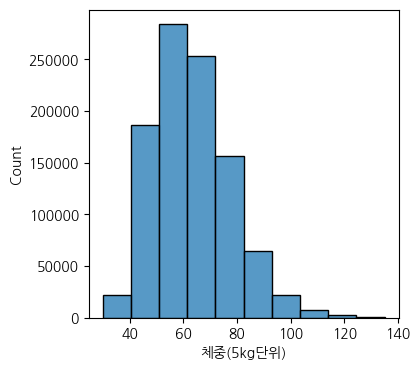

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
sns.histplot(data=df, x='체중(5kg단위)', bins=10)
plt.show()

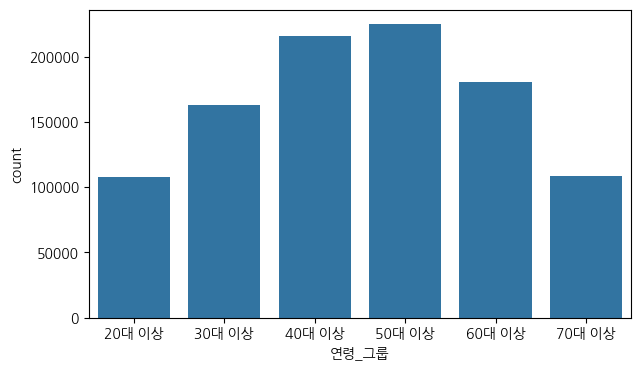

In [ ]:
sort_age = df['연령_그룹'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(7,4))
sns.barplot(data=sort_age)
plt.show()

### 속성 간의 관계 살펴보기

#### 문제11 : 상관관계 분석하기
- 수치형 데이터 간의 상관 관계를 계산하고 히트맵을 사용해 시각화해보세요.

In [ ]:
df.head(1)

,기준년도,가입자일련번호,시도코드,성별,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,연령_그룹
0,2022,702763,41,2,14,160,75,89.0,1.0,1.0,1.0,1.0,127.0,73.0,84.0,NaN,NaN,NaN,NaN,14.8,1.0,0.8,25.0,20.0,15.0,1.0,0.0,0,NaN,NaN,60대 이상


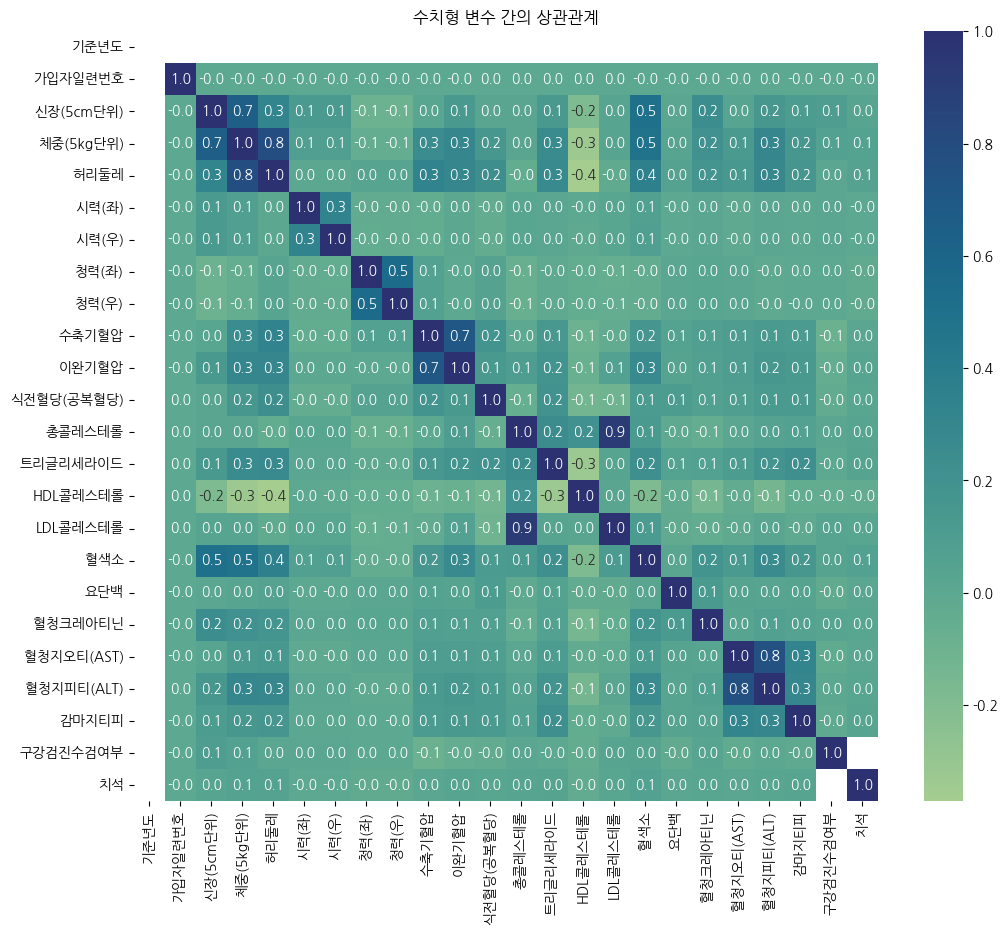

In [ ]:
ob_list  =['성별', '연령대코드(5세단위)', '흡연상태', '음주여부', '치아우식증유무', '시도코드']

for i in ob_list:
    df[i] = df[i].astype('object')

# 숫자형 데이터만 선택
numeric_df = df.select_dtypes(include=['number'])

# 히트맵 생성
plt.figure(figsize=(12, 10))  # 그래프 크기 설정
sns.heatmap(data=numeric_df.corr(), annot=True, cmap="crest", fmt=".1f")
plt.title('수치형 변수 간의 상관관계')
plt.show()

In [ ]:
# 위 시각화에서 찾을 수 있는 관계성은 어떤 것이 있나요?

- 체중 :  허리둘레 : 0.8
- 총 콜레스테롤 : LDL콜레스테롤 : 0.9
- 혈색소와 체중 : 0.5
- 혈색소와 신장 : 0.5

#### 문제12 : 수치형 변수들 간의 산점도 및 각 변수의 히스토그램을 그려 보세요

- 4가지 변수('신장(5cm단위)', '체중(5kg단위)', '허리둘레', '수축기혈압')에 대한 시각화를 진행해보세요.

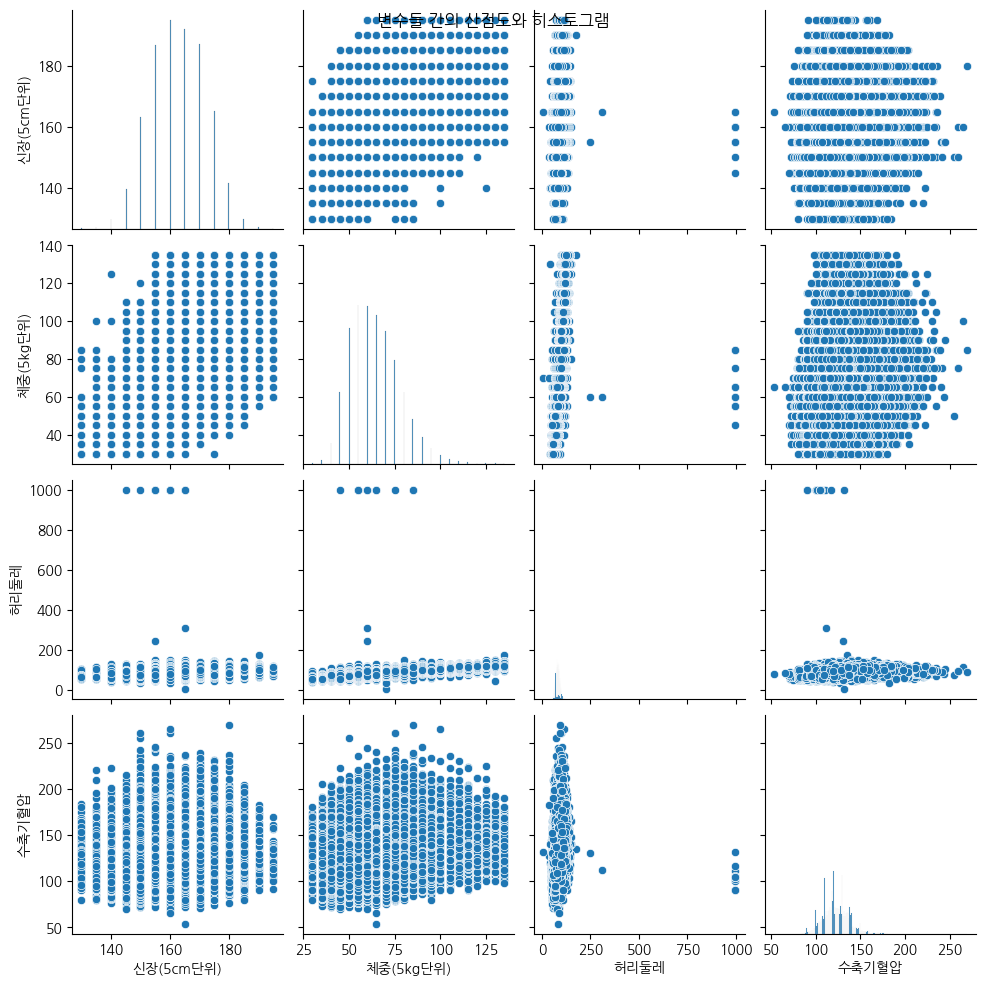

In [ ]:
# 수치형 변수들에 대한 Pair Plot 그리기

# 선택할 변수 목록
variables = ['신장(5cm단위)', '체중(5kg단위)', '허리둘레', '수축기혈압']

# seaborn의 pairplot을 사용하여 산점도와 히스토그램 시각화
sns.pairplot(df[variables])
plt.suptitle('변수들 간의 산점도와 히스토그램')
plt.show()

#### 문제13 : 성별에 따른 몇 가지 주요 수치형 변수(신장, 체중, 허리둘레, 수축기혈압)의 기술 통계 비교하기

- 범주형 변수에 따른 수치형 변수의 분포 분석해봅시다. 성별이 주요 건강 지표(신장, 체중, 허리둘레, 수축기혈압)에 어떻게 영향을 미치는지 파악하고 싶습니다.

- 카테고리별 수치형 변수의 기술 통계 분석: 각 카테고리별로 수치형 변수의 평균, 중앙값, 분산 등을 비교합니다.

In [ ]:
df.groupby(by='성별').agg({
    '신장(5cm단위)' : ['mean', 'median', 'std'],
    '체중(5kg단위)' : ['mean', 'median', 'std'],
    '허리둘레' : ['mean', 'median', 'std'],
    '수축기혈압' : ['mean', 'median', 'std']
})

신장(5cm단위)                   체중(5kg단위)                         허리둘레  \
          mean median       std       mean median        std       mean   
성별                                                                        
1   169.051341  170.0  6.739357  71.856992   70.0  12.439555  86.071713   
2   155.806872  155.0  6.483474  56.267952   55.0  10.131779  76.475740   

                           수축기혈압                    
   median        std        mean median        std  
성별                                                  
1    86.0   9.037386  125.614855  125.0  13.655867  
2    75.8  10.860201  120.525809  119.0  15.258578

#### 문제14 : 성별에 따른 몇 가지 주요 수치형 변수(신장, 체중, 허리둘레, 수축기혈압)의 분포를 비교하기

- 성별에 따른 몇 가지 주요 수치형 변수(신장, 체중, 허리둘레, 수축기혈압)의 분포를 시각화하여 비교해보세요.
- 시각화 방법은 자유롭게 선택하셔도 됩니다.

In [ ]:
df['신장'].value_counts().sort_index()

df['신장 그룹'] = np.where(df['신장'] >= 180, '180 이상',
                  np.where(df['신장'] >= 170, '170 이상',
                  np.where(df['신장'] >= 160, '160 이상',
                  np.where(df['신장'] >= 150, '150 이상', '140 이하'))))

df = df.dropna()

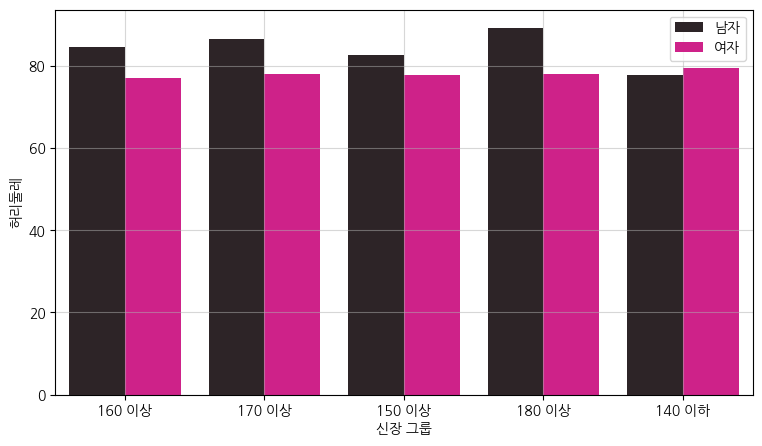

In [ ]:
fig, ax = plt.subplots(figsize=(9,5))
sns.barplot(data=df, x='신장 그룹', y='허리둘레', hue='성별', errorbar=None, color='#EB058F')
plt.legend(labels=['남자', '여자'])
plt.grid(alpha=0.5)
plt.show()

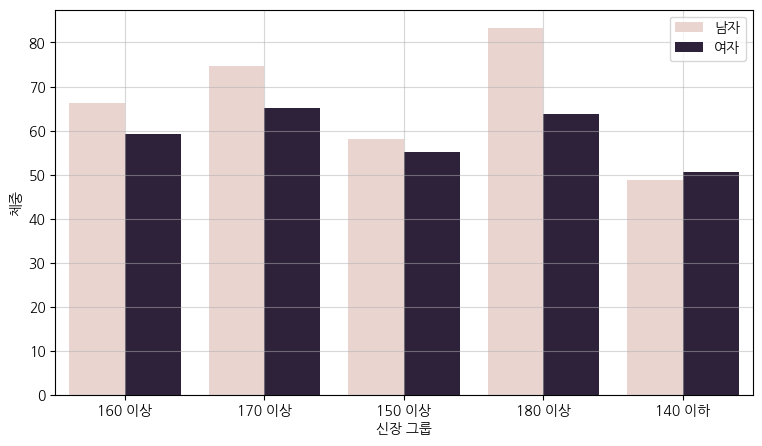

In [ ]:
fig, ax = plt.subplots(figsize=(9,5))
sns.barplot(data=df, x='신장 그룹', y='체중', hue='성별', errorbar=None)
plt.legend(labels=['남자', '여자'])
plt.grid(alpha=0.5)
plt.show()

# 위 시각화에서 어떤 인사이트를 확인할 수 있나요?
- 체중을 기준으로 남자가 모든 신장에서 높게 나왔으며
- 허리둘레도 동일하게 남자가 높게 나온 것을 알수 있었습니다.

#### 문제15 : 성별에 따른 흡연상태의 비율을 시각화해보세요

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(data=df, x='흡연상태', hue='성별')
plt.show()

# 위 시각화에서 어떤 인사이트를 확인할 수 있나요?

- 흡연여부에는 여자가 대부분 흡연을 하지 않는 것으로 보임
- 흡연을 하거나 끊은 수도 남자가 월등히 높은 것으로 보임


#### 문제16 : 연령대별로 주요 건강 지표(신장, 체중, 허리둘레, 수축기혈압)를 분석해보세요.
- 연령대별로 이러한 지표들의 평균 값을 계산하여 피봇테이블을 생성하세요.

In [ ]:
df.groupby('연령_그룹')[['신장', '체중', '허리둘레','수축기혈압']].mean()

,신장,체중,허리둘레,수축기혈압
연령_그룹,,,,
20대 이상,172.076167,74.064105,83.610643,120.947621
30대 이상,172.368879,76.725858,86.805410,122.443570
40대 이상,165.293306,66.707718,81.507799,119.972639
50대 이상,162.082335,63.656241,81.489151,122.391273
60대 이상,159.167654,61.331181,82.627032,125.279560
70대 이상,155.870327,58.623619,84.369159,130.428101


# 위 데이터에서 어떤 인사이트를 확인할 수 있나요?


- 신장 평균은 20대가 가장 높음
- 체중 평균은 30대가 가장 높음
- 허리둘레는 70대 이상이 가장 높음, 나이가 높을수록 허리둘레 수치도 높음
    - 하지만 80,90대도 포함이 되어 있음을 인지
- 수축기혈압은 70대 이상, 60대 이상 순으로 나이가 높을수록 수축기혈압이 높은 것으로 보임

#### 문제17 : 각 지표별로 연령대에 따른 평균값의 변화 추이를 그래프로 시각화해보세요.

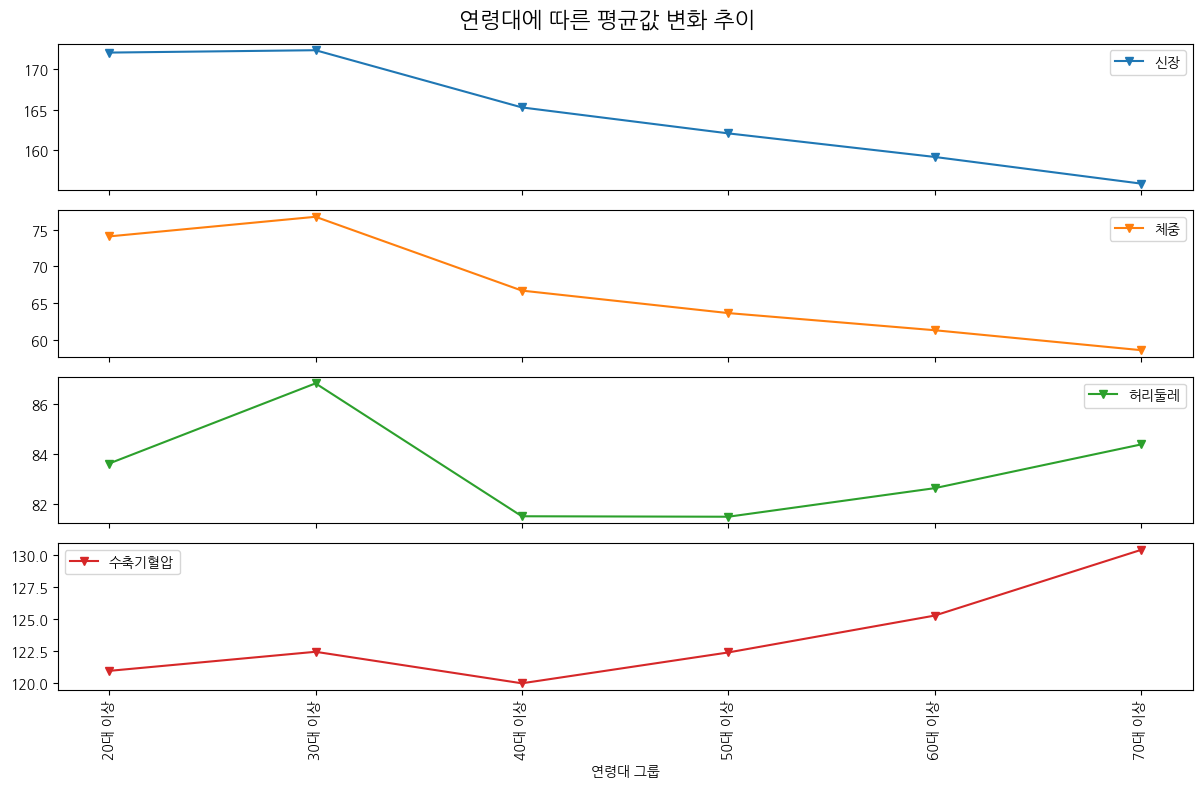

In [ ]:
# 연령대별 평균값 계산
age_group_data = df.groupby('연령_그룹')[['신장', '체중', '허리둘레', '수축기혈압']].mean()

# 그래프 시각화
#fig, ax = plt.subplots(figsize=(12, 8))
#sns.lineplot(data=age_group_data, x='연령_그룹', y='신장')
age_group_data.plot(subplots=True, figsize=(12, 8), marker='v')

plt.suptitle('연령대에 따른 평균값 변화 추이', fontsize=16)
plt.xlabel('연령대 그룹')
plt.xticks(rotation=90)  # x축 레이블 회전
plt.tight_layout()  # subplot 간 간격 조정
plt.show()

#### 문제18 : BMI를 계산하고, 각 범주별로 분류해부세요.

체질량 지수(BMI)는 개인의 체중(kg)을 신장(m)의 제곱으로 나눈 값으로 계산하며, 비만도를 판단하는 데 널리 사용됩니다. BMI를 계산하여 각 개인의 비만도를 분류해보세요.


$$BMI= \frac{체중(kg)}{신장(m)^2}$$

BMI에 따른 비만도 분류는 다음과 같습니다:

- 저체중: BMI < 18.5
- 정상 체중: 18.5 ≤ BMI < 25
- 과체중: 25 ≤ BMI < 30
- 비만: BMI ≥ 30

세계보건기구(WHO)의 BMI 분류는 다음과 같습니다:

- 저체중: BMI < 18.5
- 정상: 18.5 ≤ BMI < 24.9
- 과체중: 24.9 ≤ BMI < 30
- 비만: BMI ≥ 30

In [ ]:
df = df.rename(columns={
    '신장(5cm단위)' : '신장',
    '체중(5kg단위)' : '체중',
    '연령대코드(5세단위)' : '연령대코드'
})

df.head(1)

,기준년도,가입자일련번호,시도코드,성별,연령대코드,신장,체중,허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,연령_그룹,신장 그룹,BMI
654336,2022,3955070,11,1,13,165,60,80.0,0.8,0.9,1.0,1.0,118.0,68.0,103.0,243.0,120.0,85.0,134.0,14.0,1.0,1.0,22.0,17.0,34.0,2.0,1.0,1,0.0,0.0,60대 이상,160 이상,22.039


In [ ]:
df['BMI'] = round(df['체중'] / (df['신장'] / 100) ** 2, 3)
df.head(1)

,기준년도,가입자일련번호,시도코드,성별,연령대코드,신장,체중,허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,연령_그룹,신장 그룹,BMI
654336,2022,3955070,11,1,13,165,60,80.0,0.8,0.9,1.0,1.0,118.0,68.0,103.0,243.0,120.0,85.0,134.0,14.0,1.0,1.0,22.0,17.0,34.0,2.0,1.0,1,0.0,0.0,60대 이상,160 이상,22.039


In [ ]:
df['BMI_그룹'] = np.where(df['BMI'] >= 30, '비만',
                 np.where(df['BMI'] >= 24.9, '과체중',
                 np.where(df['BMI'] >= 18.5, '정상', '저체중')))

df.head(1)

,기준년도,가입자일련번호,시도코드,성별,연령대코드,신장,체중,허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,연령_그룹,신장 그룹,BMI,BMI_그룹
654336,2022,3955070,11,1,13,165,60,80.0,0.8,0.9,1.0,1.0,118.0,68.0,103.0,243.0,120.0,85.0,134.0,14.0,1.0,1.0,22.0,17.0,34.0,2.0,1.0,1,0.0,0.0,60대 이상,160 이상,22.039,정상


#### 문제19 : BMI 대한 기초 통계량을 확인해보세요.

In [ ]:
# BMI에 관한 기초 통계량 계산
df['BMI'].describe()

,BMI
count,106876.000000
mean,24.401402
std,3.764292
min,11.719000
25%,22.039000
50%,24.221000
75%,26.235000
max,52.734000


In [ ]:
df['BMI_그룹'].describe()

,BMI_그룹
count,106876
unique,4
top,정상
freq,59327


#### 문제20 : BMI에 대한 분포를 더 자세히 살펴보기 위해 히스토그램과 박스 플롯을 사용해 시각화해보세요.

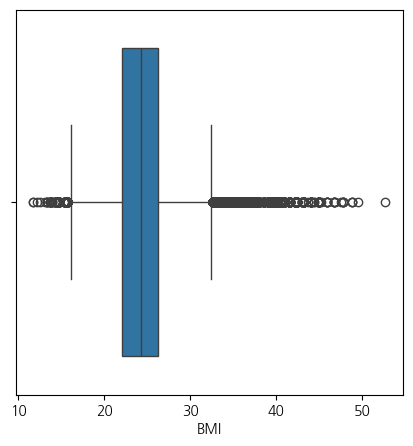

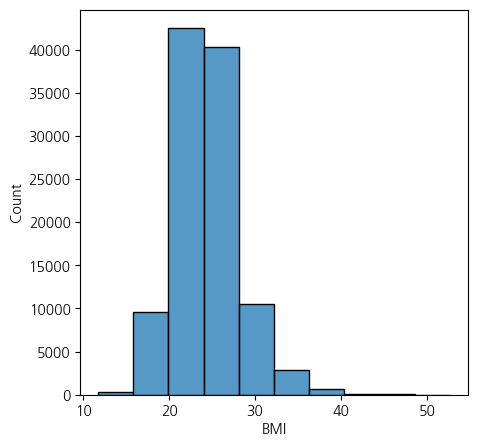

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(x=df['BMI_그룹', y='신장', hue='성별'])
plt.show()

fig, ax = plt.subplots(figsize=(5,5))
sns.histplot(data=df['BMI'], bins=10)
plt.show()

# 위 시각화에서 어떤 인사이트를 확인할 수 있나요?
- 18~25인 정상수치가 가장 많았고
- 25 이상인 과체중 인원들도 2번쨰로 많은 것을 확인
- 이상치가 많음
- 20~ 30 사이에 값들이 집중되서 분포되고 있음

#### 문제21 : BMI 범주별 분포를 분석해보세요.
- 위에서 분류한 각 범주별로 인구 분포를 확인해보세요.

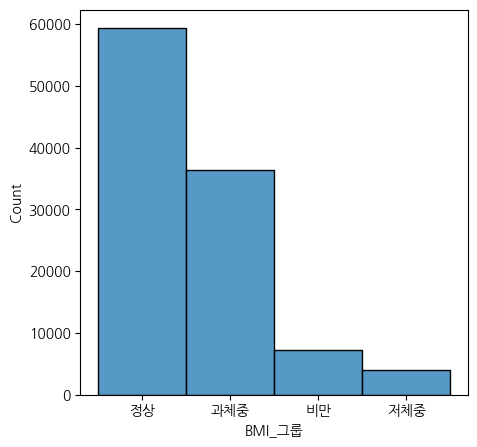

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.histplot(data=df, x='BMI_그룹', bins=10)
plt.show()

# 위 시각화에서 어떤 인사이트를 확인할 수 있나요?
 - 저체중 > 비만 > 과제충 > 정상 순으로 수치가 높은 것을 알 수 있음

#### 문제22 : 비만도(BMI 범주)와 다른 건강 지표(수축기혈압, 이완기혈압, 식전혈당) 간의 관계를 살펴보세요
- 기술 통계와 시각화를 모두 진행해주세요.

In [ ]:
df.groupby('BMI_그룹')[['수축기혈압', '이완기혈압', '식전혈당(공복혈당)']].agg(['max', 'min', 'mean'])

수축기혈압                    이완기혈압                  식전혈당(공복혈당)        \
          max   min        mean    max   min       mean        max   min   
BMI_그룹                                                                     
과체중     215.0  66.0  125.964996  136.0  39.0  77.677191      489.0  49.0   
비만      260.0  90.0  130.336996  145.0  46.0  81.152017      489.0  52.0   
저체중     188.0  78.0  114.447268  120.0  42.0  70.849047      426.0  50.0   
정상      208.0  80.0  120.705379  144.0  37.0  74.128154      497.0  47.0   

                    
              mean  
BMI_그룹              
과체중     104.117642  
비만      108.666064  
저체중      94.561626  
정상       99.158916

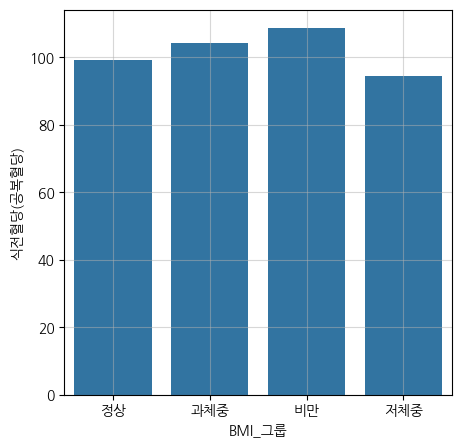

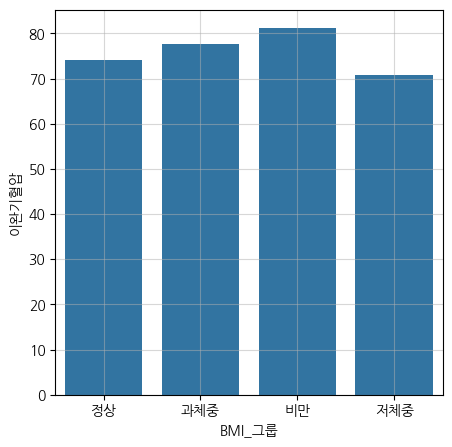

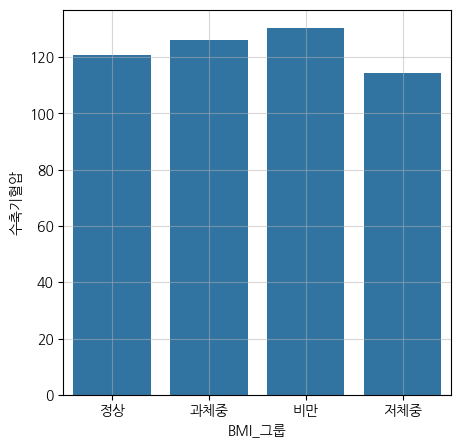

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(data=df, x='BMI_그룹', y='식전혈당(공복혈당)', errorbar=None)
plt.grid(alpha=0.5)
plt.show()

fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(data=df, x='BMI_그룹', y='이완기혈압', errorbar=None)
plt.grid(alpha=0.5)
plt.show()

fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(data=df, x='BMI_그룹', y='수축기혈압', errorbar=None)
plt.grid(alpha=0.5)
plt.show()

# 위 데이터에서 어떤 인사이트를 확인할 수 있나요?
- 공복혈당에서 비만그룹과 과체중그룹이 정상그룹보다 평균 10정도 높은 것으로 확인
- 수축기 혈압에서도 비만인 경우 260의 수치가, 정상인 경우 208의 수치로, 큰 차이가 나타남
- 전체적으로 체중이 높은 그룹이 수축기혈압, 이완기혈압, 식전혈당에서 정상그룹 보다 높은 수치를 나타내는 것으로 보임

#### 문제23 : 연령대 및 성별에 따른 BMI 변화를 분석해보세요.
- 연령대가 증가함에 따라 BMI가 어떻게 변화하는지, 그리고 남성과 여성 간의 차이가 있는지를 파악해보세요.
- 데이터를 성별과 연령대 코드로 그룹화하여 각 그룹의 평균 BMI를 계산하고 시각화해보세요.  

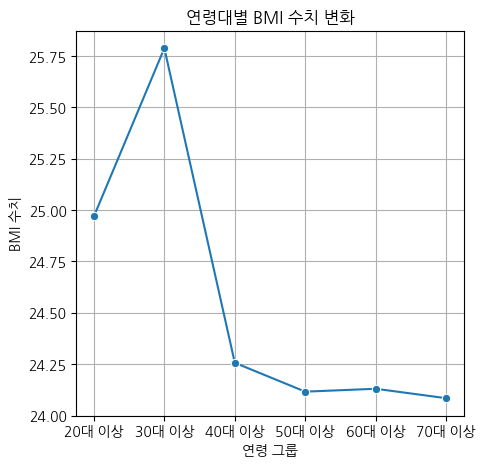

In [ ]:
# 연령대별 평균값 계산
age_group_data = df.groupby('연령_그룹')['BMI'].mean().reset_index()

fig, ax = plt.subplots(figsize=(5,5))
sns.lineplot(data=age_group_data, x='연령_그룹', y='BMI', marker='o')
plt.title('연령대별 BMI 수치 변화')
plt.xlabel('연령 그룹')
plt.ylabel('BMI 수치')
plt.grid()
plt.show()

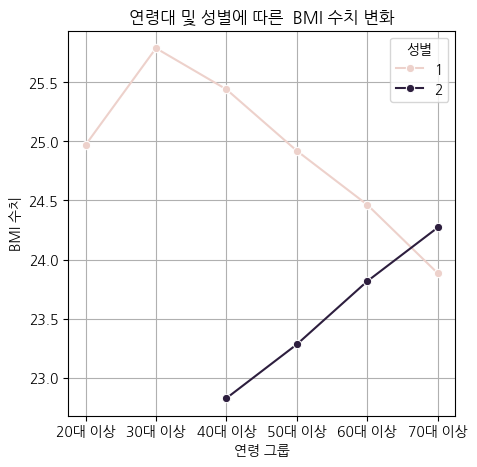

In [ ]:
# 연령대별 평균값 계산
age_group_data = df.groupby(['연령_그룹','성별'])['BMI'].mean().reset_index()

fig, ax = plt.subplots(figsize=(5,5))
sns.lineplot(data=age_group_data, x='연령_그룹', y='BMI', hue='성별', marker='o')
plt.title('연령대 및 성별에 따른  BMI 수치 변화')
plt.xlabel('연령 그룹')
plt.ylabel('BMI 수치')
plt.grid()
plt.show()

In [ ]:
df.groupby(['연령_그룹','성별'])['BMI'].mean()

연령_그룹   성별
20대 이상  1     24.969354
30대 이상  1     25.788330
40대 이상  1     25.439983
        2     22.827773
50대 이상  1     24.919952
        2     23.283249
60대 이상  1     24.463665
        2     23.817488
70대 이상  1     23.884214
        2     24.271621
Name: BMI, dtype: float64

# 위 시각화에서 어떤 인사이트를 확인할 수 있나요?
- 연령대가 높을수록 BMI 수치는 낮아지는 것을 알 수 있습니다
- BMI수치는 20대에는 증가하는 추세이며, 30대에서 가자 높은 수치를 보이고 있음
- 결측치 제거로 20대 30대 여성은 나타나지 않음
    - 여자인 경우 연령대가 높을수록  BMI 수치가 높아지는 것을 확인할 수 있다
    - 반대로 남자인 경우 연령대가 높아질수록 BMI 수치는 낮아지는 것을 할 수 있다
- 40대에는 남자가 여자보다 BMI 평균 수치가 높고
- 50대, 60대애도 동일한 결과가 나왔으며 70대 이상에서는 여자가 남자보다 높은 수치를 보임
-

## 마무리

다양한 통계 및 시각화 분석을 진행하였습니다. 모두들 수고하셨습니다.    
제공된 문제 이외에도 다양한 분석을 진행할 수 있습니다. 마음껏 도전해보세요!